# 1. Library Imports

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import re

# 2. Dataset imports

In [2]:
df_good =  pd.read_csv('Data/good_movie_reviews.csv', parse_dates=['date']) 
df_bad = pd.read_csv('Data/bad_movie_reviews.csv', parse_dates=['date'])

print('Amount of registries from good movies: ', df_good.shape[0])
print('Amount of registries from bad movies: ', df_bad.shape[0])

Amount of registries from good movies:  7229
Amount of registries from bad movies:  7259


# 3. Filters

- Year between 2022 and 2023
- Only english comments (en)
- Keep only the comments column
- Concatenate both data frames (Union)

In [19]:
df_good_filtered = df_good.query('date.dt.year >= 2022 and date.dt.year <= 2023 and language == "en"')[['comments']]
df_bad_filtered = df_bad.query('date.dt.year >= 2022 and date.dt.year <= 2023 and language == "en"')[['comments']]

In [20]:
df_reviews = pd.concat([df_good_filtered, df_bad_filtered])

print('Amount of registries from all movies: ', df_reviews.shape[0])

Amount of registries from all movies:  14480


# 4. Ploting the first wordcloud

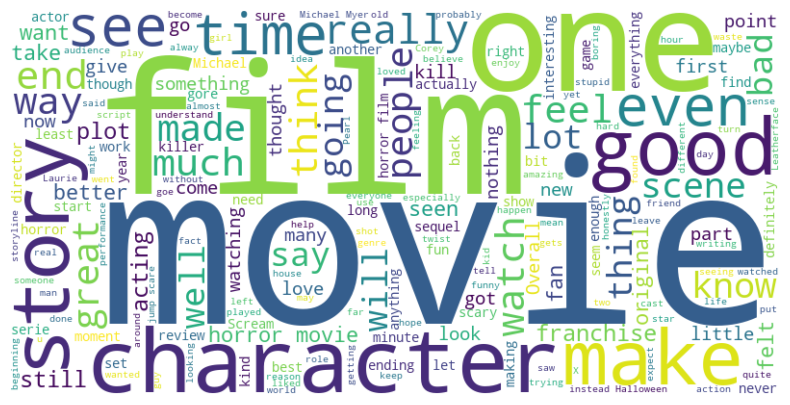

In [21]:
# Concatenate all text from the 'text_column'
text = " ".join(df_reviews['comments'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.show()

# 5. Cleaning Process

## 5.1. Punctuation

In [22]:
# Function to remove punctuation from a string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [23]:
# Apply the function to the 'text' column
df_reviews['comments'] = df_reviews['comments'].apply(remove_punctuation)

In [24]:
df_reviews

comments
0     Talk to Me is a stone cold classic of the horr...
1     A group of youngsters discover that by taking ...
2     Danny and Michael Philippou have truly made so...
3     I watched Talk to Me early as part of Regals M...
4     The premise was what initially drew me to this...
...                                                 ...
7254  I tought Im gonna be giving it 810 stars while...
7255  We have no context for the boogeyman what it a...
7256  Honestly 1010 horror movie I watch A LOT of ho...
7257  Too much too fast ZERO CONTEXT I dont want to ...
7258  Wonderful movie 😍\r\nVery good morning proud o...

[14480 rows x 1 columns]

## 5.2. Emojis

In [25]:
# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [26]:
# Apply the function to the 'text' column
df_reviews['comments'] = df_reviews['comments'].apply(remove_emojis)

In [27]:
df_reviews

comments
0     Talk to Me is a stone cold classic of the horr...
1     A group of youngsters discover that by taking ...
2     Danny and Michael Philippou have truly made so...
3     I watched Talk to Me early as part of Regals M...
4     The premise was what initially drew me to this...
...                                                 ...
7254  I tought Im gonna be giving it 810 stars while...
7255  We have no context for the boogeyman what it a...
7256  Honestly 1010 horror movie I watch A LOT of ho...
7257  Too much too fast ZERO CONTEXT I dont want to ...
7258  Wonderful movie \r\nVery good morning proud of...

[14480 rows x 1 columns]

## 5.3. Numbers

In [28]:
# Remove numbers from the columns using str.replace()
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [29]:
df_reviews

comments
0     Talk to Me is a stone cold classic of the horr...
1     A group of youngsters discover that by taking ...
2     Danny and Michael Philippou have truly made so...
3     I watched Talk to Me early as part of Regals M...
4     The premise was what initially drew me to this...
...                                                 ...
7254  I tought Im gonna be giving it  stars while wa...
7255  We have no context for the boogeyman what it a...
7256  Honestly  horror movie I watch A LOT of horror...
7257  Too much too fast ZERO CONTEXT I dont want to ...
7258  Wonderful movie \r\nVery good morning proud of...

[14480 rows x 1 columns]

## 5.4. Special Charaters

In [33]:
# Apply the function to the 'text' column
df_reviews['comments'] = df_reviews['comments'].str.replace('[^a-zA-Z0-9\s]|\\r\\n', '', regex=True)

In [34]:
df_reviews

comments
0     Talk to Me is a stone cold classic of the horr...
1     A group of youngsters discover that by taking ...
2     Danny and Michael Philippou have truly made so...
3     I watched Talk to Me early as part of Regals M...
4     The premise was what initially drew me to this...
...                                                 ...
7254  I tought Im gonna be giving it  stars while wa...
7255  We have no context for the boogeyman what it a...
7256  Honestly  horror movie I watch A LOT of horror...
7257  Too much too fast ZERO CONTEXT I dont want to ...
7258  Wonderful movie Very good morning proud of you...

[14480 rows x 1 columns]

## 5.5. White spaces and lower casing

In [35]:
df_reviews = df_reviews.assign(comments = lambda x: x.comments.str.lower().str.strip())

df_reviews

comments
0     talk to me is a stone cold classic of the horr...
1     a group of youngsters discover that by taking ...
2     danny and michael philippou have truly made so...
3     i watched talk to me early as part of regals m...
4     the premise was what initially drew me to this...
...                                                 ...
7254  i tought im gonna be giving it  stars while wa...
7255  we have no context for the boogeyman what it a...
7256  honestly  horror movie i watch a lot of horror...
7257  too much too fast zero context i dont want to ...
7258  wonderful movie very good morning proud of you...

[14480 rows x 1 columns]

# 6. Ploting the second word cloud

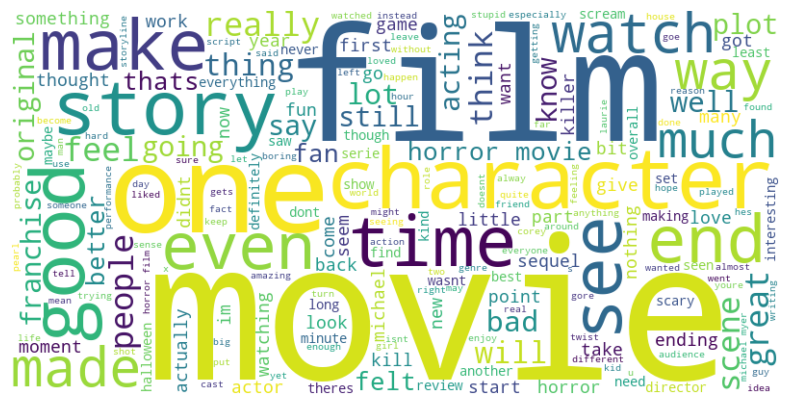

In [36]:
# Concatenate all text from the 'text_column'
text = " ".join(df_reviews['comments'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.show()